# 20250823数据正先导部分分析

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame

## 定义绘图函数

In [2]:
def plot_2d_result(results:DataFrame,start_loc:int, end_loc:int):
    # 提取数据
    azimuth = results['Azimuth']
    elevation = results['Elevation']
    # 设置图形背景为白色
    plt.figure(facecolor='white')
    # 绘制单色散点图
    plt.scatter(azimuth, elevation, 
                s=2,  # 点大小
                color='black',  # 单色设置
                alpha=0.8,  # 透明度
                marker='o')  # 点样式
    
    # 设置标题和轴标签（深色文字）
    plt.title(f'{start_loc:.3e} - {end_loc:.3e} : {len(azimuth)} points', fontsize=16, fontweight='bold', color='black')
    plt.xlabel('Azimuth / °', fontsize=12, color='black')
    plt.ylabel('Elevation / °', fontsize=12, color='black')
    
    # 设置坐标轴范围和刻度
    plt.xlim(250 , 300)
    plt.xticks(range(250, 301, 10))  # 250到300，间隔10
    plt.ylim(55, 80)
    plt.yticks(range(55, 81, 5))  # 55到85，间隔5
    # 调整布局并显示
    plt.tight_layout()
    plt.show()

## 定义计算梯级间隔函数

In [3]:
def cal_step_interval(results:DataFrame,start_loc:int, end_loc:int, thea:int = 3000 ):
    time_diffs = np.diff(results.Start_loc)
    max_diff_idx = np.argmax(time_diffs)
    corresponding_start_loc = results.Start_loc.iloc[max_diff_idx]
    print("最大的间隔位于:", corresponding_start_loc)
    # 查看时间间隔大于某阈值的个数
    filtered_positive_time_diffs = time_diffs[time_diffs > thea] * 5 / 1e3
    print(f"时间间隔大于{thea}的个数有：{len(filtered_positive_time_diffs)}")
    print(f"正先导 {start_loc}-{end_loc} 阶段的时间间隔分布情况：\n",
          pd.DataFrame(data=filtered_positive_time_diffs).describe())

## 定义计算梯级持续时间的函数

In [4]:
def cal_step_duration(results:DataFrame,start_loc:int, end_loc:int, thea:int = 3000):
    time_diffs = np.diff(results.Start_loc)
    filtered_indices = np.where(time_diffs > thea)
    filtered_start_loc = results.Start_loc.iloc[filtered_indices[0]].values    # .values 将结果转为Numpy数组
    start_locs = filtered_start_loc[:-1]  # 去掉最后一个元素
    end_locs = filtered_start_loc[1:]    # 去掉第一个元素
    # 拼接为元组列表
    loc_tuples = list(zip(start_locs, end_locs))
    durations = []
    for i, loc_tuple in enumerate(loc_tuples):
        durations.append((loc_tuple[1]-loc_tuple[0])*5/1e3)
    durations_df = pd.DataFrame(data=durations)
    print(f"正先导 {start_loc}-{end_loc} 阶段的梯级持续时间分布情况：\n",durations_df.describe())       

## 分段分析梯级步长

In [5]:
result = pd.read_csv('results/20250823172542_1505_result_yld_5.95e8_8.95e8_hann_2048_256_bandpass_hann_30e6_80e6.txt', sep=r'\s+')

### 第一段信号 :start_loc = 8.16e8 , end_loc = 8.17e8

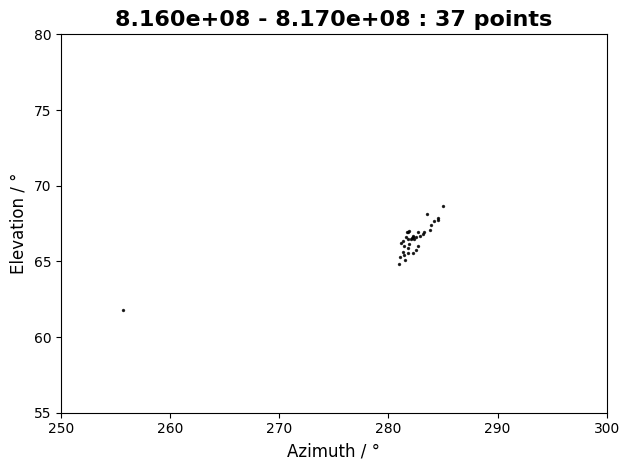

In [6]:
# 绘制二维结果
start_loc = 8.16e8
end_loc = 8.17e8
# 对2d结果进行过滤筛选
filtered_result = result[
    (abs(result['t123']) < 1) &  
    (abs(result['Rcorr']) > 0.3) &  
    (result['Start_loc'] < end_loc) & 
    (result['Start_loc'] > start_loc) &
    (result.Azimuth > 250 ) & 
    (result.Azimuth < 300 ) & 
    (result.Elevation < 80) & 
    (result.Elevation > 55)
    ]

# 绘制图像
plot_2d_result(filtered_result,start_loc, end_loc)


In [7]:
# 分析梯级间隔
cal_step_interval(filtered_result,start_loc,end_loc)

最大的间隔位于: 816065453
时间间隔大于3000的个数有：8
正先导 816000000.0-817000000.0 阶段的时间间隔分布情况：
                  0
count     8.000000
mean    351.248125
std     849.971208
min      18.715000
25%      30.167500
50%      48.295000
75%      83.556250
max    2453.295000


In [8]:
# 分析梯级的持续时间
cal_step_duration(filtered_result,start_loc,end_loc)

正先导 816000000.0-817000000.0 阶段的梯级持续时间分布情况：
                  0
count     7.000000
mean    409.427857
std     901.599057
min      43.745000
25%      51.677500
50%      64.555000
75%     100.522500
max    2453.295000


### 第二段信号 : start_loc = 827502315 , end_loc = 8.28e8

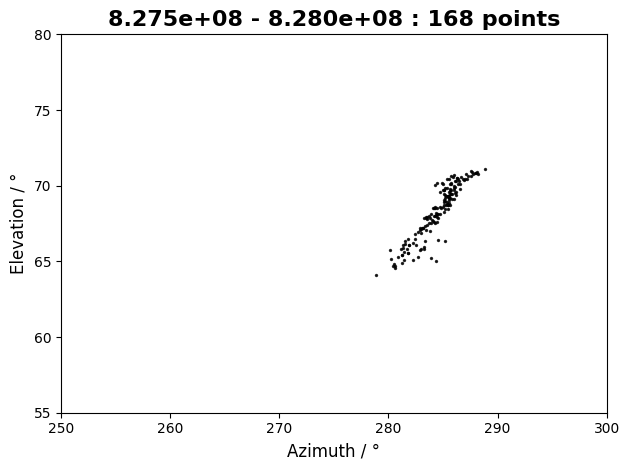

In [9]:
start_loc = 827502315 
end_loc = 8.28e8
filtered_result = result[
    (abs(result['t123']) < 1) &  
    (abs(result['Rcorr']) > 0.3) &  
    (result['Start_loc'] < end_loc) & 
    (result['Start_loc'] > start_loc) &
    (result.Azimuth > 250 ) & 
    (result.Azimuth < 300 ) & 
    (result.Elevation < 80) & 
    (result.Elevation > 55)
    ]

# 绘制图像
plot_2d_result(filtered_result,start_loc, end_loc)


In [10]:
# 分析梯级间隔
cal_step_interval(filtered_result,start_loc,end_loc)

最大的间隔位于: 827656881
时间间隔大于3000的个数有：9
正先导 827502315-828000000.0 阶段的时间间隔分布情况：
                0
count   9.000000
mean   24.703333
std    15.663672
min    15.455000
25%    16.125000
50%    18.185000
75%    22.905000
max    63.075000


In [11]:
# 分析梯级的持续时间
cal_step_duration(filtered_result,start_loc,end_loc)

正先导 827502315-828000000.0 阶段的梯级持续时间分布情况：
                 0
count    8.000000
mean    82.109375
std     78.535143
min     15.455000
25%     30.105000
50%     64.220000
75%     92.097500
max    259.160000


### 第三段信号 : start_loc = 8.3e8 , end_loc = 8.31e8

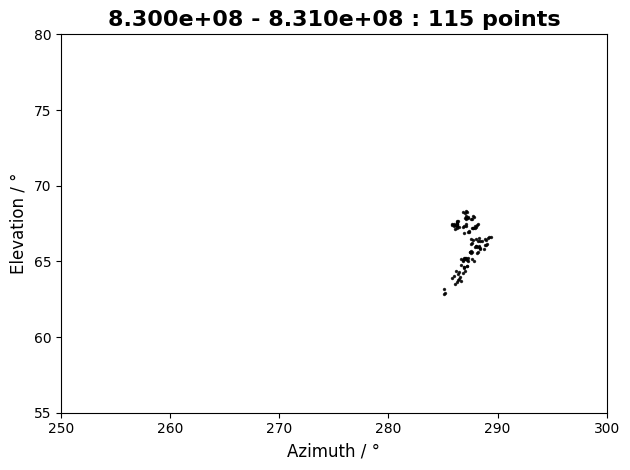

In [12]:
start_loc = 8.3e8
end_loc = 8.31e8
filtered_result = result[
    (abs(result['t123']) < 1) &  
    (abs(result['Rcorr']) > 0.3) &  
    (result['Start_loc'] < end_loc) & 
    (result['Start_loc'] > start_loc) &
    (result.Azimuth > 250 ) & 
    (result.Azimuth < 300 ) & 
    (result.Elevation < 80) & 
    (result.Elevation > 55)
    ]

# 绘制图像
plot_2d_result(filtered_result,start_loc, end_loc)


In [13]:
# 分析梯级间隔
cal_step_interval(filtered_result,start_loc,end_loc)

最大的间隔位于: 830748801
时间间隔大于3000的个数有：29
正先导 830000000.0-831000000.0 阶段的时间间隔分布情况：
               0
count  29.00000
mean   25.01500
std    10.72487
min    15.08000
25%    16.94500
50%    21.69500
75%    29.43500
max    54.78000


In [14]:
# 分析梯级的持续时间
cal_step_duration(filtered_result,start_loc,end_loc)

正先导 830000000.0-831000000.0 阶段的梯级持续时间分布情况：
               0
count  28.00000
mean   34.47000
std    16.18323
min    16.85500
25%    21.21375
50%    31.77000
75%    45.95250
max    77.19000


### 第四阶段： start_loc = 8.36e8 , end_loc = 8.37e8

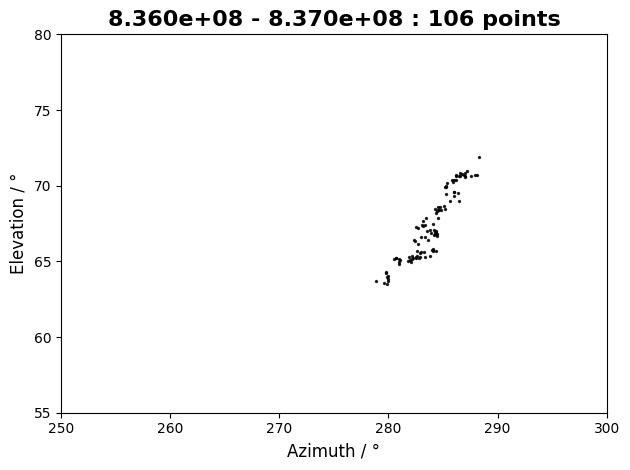

In [15]:
start_loc = 8.36e8
end_loc = 8.37e8
filtered_result = result[
    (abs(result['t123']) < 1) &  
    (abs(result['Rcorr']) > 0.3) &  
    (result['Start_loc'] < end_loc) & 
    (result['Start_loc'] > start_loc) &
    (result.Azimuth > 250 ) & 
    (result.Azimuth < 300 ) & 
    (result.Elevation < 80) & 
    (result.Elevation > 55)
    ]

# 绘制图像
plot_2d_result(filtered_result,start_loc, end_loc)


In [16]:
# 分析梯级间隔
cal_step_interval(filtered_result,start_loc,end_loc)

最大的间隔位于: 836287009
时间间隔大于3000的个数有：8
正先导 836000000.0-837000000.0 阶段的时间间隔分布情况：
                0
count    8.00000
mean    42.84500
std     43.14686
min     15.73000
25%     19.49875
50%     28.17750
75%     42.27125
max    146.37500


In [17]:
# 分析梯级的持续时间
cal_step_duration(filtered_result,start_loc,end_loc)

正先导 836000000.0-837000000.0 阶段的梯级持续时间分布情况：
                0
count    7.00000
mean    83.83000
std     56.33582
min     15.73000
25%     43.92750
50%     58.10000
75%    136.91000
max    151.30500


### 第五阶段 ： start_loc = 8.4e8 , end_loc = 8.41e8

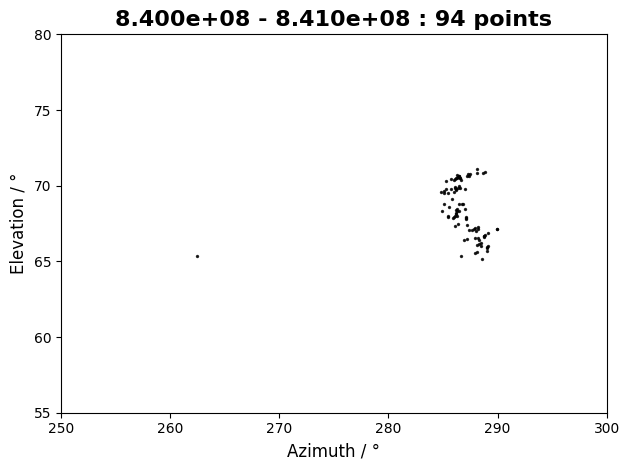

In [18]:
start_loc = 8.4e8
end_loc = 8.41e8
filtered_result = result[
    (abs(result['t123']) < 1) &  
    (abs(result['Rcorr']) > 0.3) &  
    (result['Start_loc'] < end_loc) & 
    (result['Start_loc'] > start_loc) &
    (result.Azimuth > 250 ) & 
    (result.Azimuth < 300 ) & 
    (result.Elevation < 80) & 
    (result.Elevation > 55)
    ]

# 绘制图像
plot_2d_result(filtered_result,start_loc, end_loc)


In [19]:
# 分析梯级间隔
cal_step_interval(filtered_result,start_loc,end_loc)

最大的间隔位于: 840720653
时间间隔大于3000的个数有：31
正先导 840000000.0-841000000.0 阶段的时间间隔分布情况：
                 0
count   31.000000
mean    38.994032
std     21.816240
min     15.230000
25%     22.047500
50%     29.965000
75%     52.497500
max    100.955000


In [20]:
# 分析梯级的持续时间
cal_step_duration(filtered_result,start_loc,end_loc)

正先导 840000000.0-841000000.0 阶段的梯级持续时间分布情况：
                 0
count   30.000000
mean    44.950667
std     21.698639
min     18.355000
25%     26.967500
50%     40.952500
75%     59.788750
max    105.130000


### 第六阶段 ： start_loc = 8.452e8 , end_loc = 8.46e8

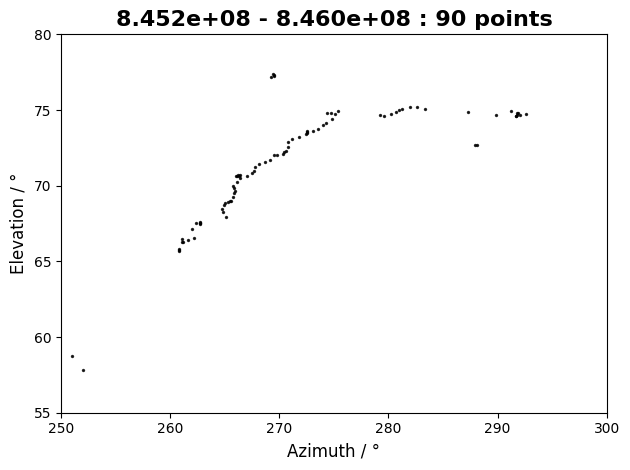

In [21]:
start_loc = 8.452e8
end_loc = 8.46e8
filtered_result = result[
    (abs(result['t123']) < 1) &  
    (abs(result['Rcorr']) > 0.3) &  
    (result['Start_loc'] < end_loc) & 
    (result['Start_loc'] > start_loc) &
    (result.Azimuth > 250 ) & 
    (result.Azimuth < 300 ) & 
    (result.Elevation < 80) & 
    (result.Elevation > 55)
    ]

# 绘制图像
plot_2d_result(filtered_result,start_loc, end_loc)


In [22]:
# 分析梯级间隔
cal_step_interval(filtered_result,start_loc,end_loc)

最大的间隔位于: 845685897
时间间隔大于3000的个数有：5
正先导 845200000.0-846000000.0 阶段的时间间隔分布情况：
                 0
count    5.000000
mean    57.813000
std     41.007644
min     15.885000
25%     16.640000
50%     60.645000
75%     93.270000
max    102.625000


In [23]:
# 分析梯级的持续时间
cal_step_duration(filtered_result,start_loc,end_loc)

正先导 845200000.0-846000000.0 阶段的梯级持续时间分布情况：
                 0
count    4.000000
mean    78.136250
std     24.992961
min     49.330000
25%     61.491250
50%     80.295000
75%     96.940000
max    102.625000


### 第七阶段 ：start_loc = 8.525e8 , end_loc = 8.535e8

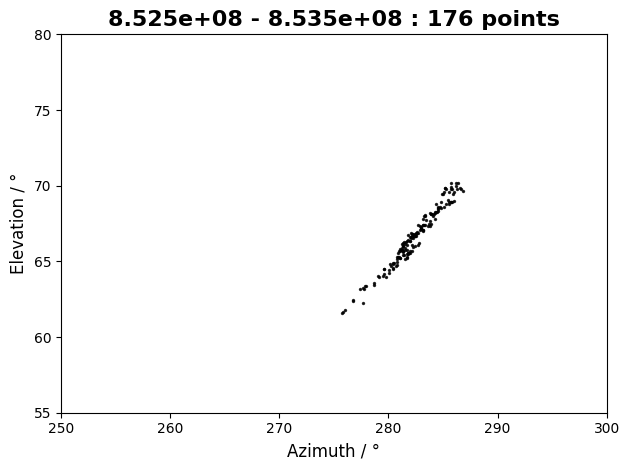

In [24]:
start_loc = 8.525e8
end_loc = 8.535e8
filtered_result = result[
    (abs(result['t123']) < 1) &  
    (abs(result['Rcorr']) > 0.3) &  
    (result['Start_loc'] < end_loc) & 
    (result['Start_loc'] > start_loc) &
    (result.Azimuth > 250 ) & 
    (result.Azimuth < 300 ) & 
    (result.Elevation < 80) & 
    (result.Elevation > 55)
    ]

# 绘制图像
plot_2d_result(filtered_result,start_loc, end_loc)


In [25]:
# 分析梯级间隔
cal_step_interval(filtered_result,start_loc,end_loc)

最大的间隔位于: 853394335
时间间隔大于3000的个数有：4
正先导 852500000.0-853500000.0 阶段的时间间隔分布情况：
                0
count   4.000000
mean   19.318750
std     3.802717
min    15.195000
25%    16.612500
50%    19.407500
75%    22.113750
max    23.265000


In [26]:
# 分析梯级的持续时间
cal_step_duration(filtered_result,start_loc,end_loc)

正先导 852500000.0-853500000.0 阶段的梯级持续时间分布情况：
                 0
count    3.000000
mean   147.735000
std    113.140378
min     50.105000
25%     85.737500
50%    121.370000
75%    196.550000
max    271.730000


### 第八阶段 ：start_loc = 8.6e8 , end_loc = 8.6067e8

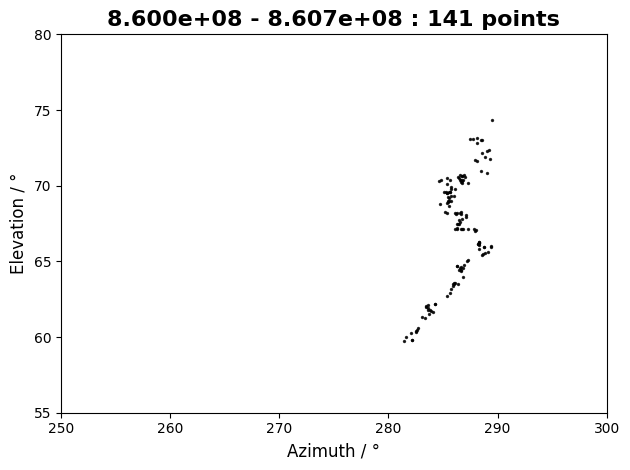

In [27]:
start_loc = 8.6e8
end_loc = 8.6067e8
filtered_result = result[
    (abs(result['t123']) < 1) &  
    (abs(result['Rcorr']) > 0.3) &  
    (result['Start_loc'] < end_loc) & 
    (result['Start_loc'] > start_loc) &
    (result.Azimuth > 250 ) & 
    (result.Azimuth < 300 ) & 
    (result.Elevation < 80) & 
    (result.Elevation > 55)
    ]

# 绘制图像
plot_2d_result(filtered_result,start_loc, end_loc)


In [28]:
# 分析梯级间隔
cal_step_interval(filtered_result,start_loc,end_loc)

最大的间隔位于: 860652610
时间间隔大于3000的个数有：7
正先导 860000000.0-860670000.0 阶段的时间间隔分布情况：
                0
count   7.000000
mean   26.579286
std    19.281914
min    15.135000
25%    17.860000
50%    20.670000
75%    22.397500
max    69.735000


In [29]:
# 分析梯级的持续时间
cal_step_duration(filtered_result,start_loc,end_loc)

正先导 860000000.0-860670000.0 阶段的梯级持续时间分布情况：
                0
count    6.00000
mean    84.16000
std     89.34361
min     21.65000
25%     30.72125
50%     59.98000
75%     76.59375
max    260.25000
